In [230]:
import pandas as pd
import numpy as np

In [231]:

labels = pd.read_fwf("./UCI_HAR_Dataset/features.txt",header=None)
X_train = pd.read_fwf("./UCI_HAR_Dataset/train/X_train.txt",header=None)
X_train.columns = labels


y_train = pd.read_fwf("./UCI_HAR_Dataset/train/y_train.txt",header=None)
y_train = pd.Series(y_train[0])

X_test = pd.read_fwf("./UCI_HAR_Dataset/test/X_test.txt",header=None)
X_test.columns = labels

y_test = pd.read_fwf("./UCI_HAR_Dataset/test/y_test.txt",header=None)
y_test = pd.Series(y_test[0])

data = pd.concat([X_train,X_test])
y = pd.concat([y_train,y_test])


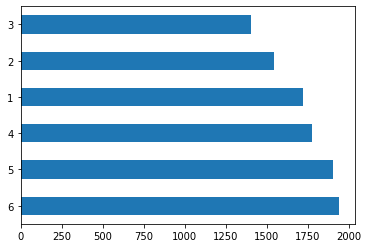

In [232]:
y.value_counts().plot(kind='barh')

In [233]:
data.isna().sum().sum()

0

In [234]:
a = pd.Series([i[0] for i in data.columns]).str.contains('Gyro')
data_gyro = data[data.columns[a]]

In [235]:
b = pd.Series([i[0] for i in data.columns]).str.contains('Acc')
data_acc = X_train[data.columns[b]]

In [236]:
data_gyro.columns.intersection(data_acc.columns) #Wiec jest gitara

Index([], dtype='object')

In [237]:
angle = data.columns.difference(data_gyro.columns.union(data_acc.columns))
data_angle = data[angle]

# Gyro

In [238]:
labels = {1: "walking", 2: "walking_upstairs", 
          3: "walking_downstairs", 4: "sitting", 
          5: "standing", 6: "laying"}
y.replace(labels, inplace=True)

In [239]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
%matplotlib inline

In [240]:
data_gyro.head()

,"(121 tBodyGyro-mean()-X,)","(122 tBodyGyro-mean()-Y,)","(123 tBodyGyro-mean()-Z,)","(124 tBodyGyro-std()-X,)","(125 tBodyGyro-std()-Y,)","(126 tBodyGyro-std()-Z,)","(127 tBodyGyro-mad()-X,)","(128 tBodyGyro-mad()-Y,)","(129 tBodyGyro-mad()-Z,)","(130 tBodyGyro-max()-X,)",...,"(547 fBodyBodyGyroJerkMag-sma(),)","(548 fBodyBodyGyroJerkMag-energy(,)","(549 fBodyBodyGyroJerkMag-iqr(),)","(550 fBodyBodyGyroJerkMag-entropy,)","(551 fBodyBodyGyroJerkMag-maxInds,)","(552 fBodyBodyGyroJerkMag-meanFre,)","(553 fBodyBodyGyroJerkMag-skewnes,)","(554 fBodyBodyGyroJerkMag-kurtosi,)","(557 angle(tBodyGyroMean,gravityM,)","(558 angle(tBodyGyroJerkMean,grav,)"
0,-0.006101,-0.031365,0.107725,-0.985310,-0.976623,-0.992205,-0.984586,-0.976353,-0.992362,-0.867044,...,-0.991990,-0.999937,-0.990458,-0.871306,-1.000000,-0.074323,-0.298676,-0.710304,-0.464761,-0.018446
1,-0.016112,-0.083894,0.100584,-0.983120,-0.989046,-0.989121,-0.986890,-0.989038,-0.989185,-0.864904,...,-0.995854,-0.999981,-0.994544,-1.000000,-1.000000,0.158075,-0.595051,-0.861499,-0.732626,0.703511
2,-0.031698,-0.102335,0.096127,-0.976292,-0.993552,-0.986379,-0.974922,-0.994122,-0.985786,-0.864904,...,-0.995031,-0.999973,-0.993755,-1.000000,-0.555556,0.414503,-0.390748,-0.760104,0.100699,0.808529
3,-0.043410,-0.091386,0.085538,-0.991385,-0.992407,-0.987554,-0.991589,-0.993142,-0.989585,-0.885320,...,-0.995221,-0.999974,-0.995226,-0.955696,-0.936508,0.404573,-0.117290,-0.482845,0.640011,-0.485366
4,-0.033960,-0.074708,0.077392,-0.985184,-0.992378,-0.987402,-0.986944,-0.992542,-0.988163,-0.870154,...,-0.995093,-0.999974,-0.995487,-1.000000,-0.936508,0.087753,-0.351471,-0.699205,0.693578,-0.615971


In [241]:
data_gyro.columns

Index([          ('121 tBodyGyro-mean()-X',),
                 ('122 tBodyGyro-mean()-Y',),
                 ('123 tBodyGyro-mean()-Z',),
                  ('124 tBodyGyro-std()-X',),
                  ('125 tBodyGyro-std()-Y',),
                  ('126 tBodyGyro-std()-Z',),
                  ('127 tBodyGyro-mad()-X',),
                  ('128 tBodyGyro-mad()-Y',),
                  ('129 tBodyGyro-mad()-Z',),
                  ('130 tBodyGyro-max()-X',),
       ...
         ('547 fBodyBodyGyroJerkMag-sma()',),
       ('548 fBodyBodyGyroJerkMag-energy(',),
         ('549 fBodyBodyGyroJerkMag-iqr()',),
       ('550 fBodyBodyGyroJerkMag-entropy',),
       ('551 fBodyBodyGyroJerkMag-maxInds',),
       ('552 fBodyBodyGyroJerkMag-meanFre',),
       ('553 fBodyBodyGyroJerkMag-skewnes',),
       ('554 fBodyBodyGyroJerkMag-kurtosi',),
       ('557 angle(tBodyGyroMean,gravityM',),
       ('558 angle(tBodyGyroJerkMean,grav',)],
      dtype='object', length=213)

In [242]:
data_gyro = data_gyro.rename(columns = lambda x : str(x)[2:5])

In [243]:
def scatter_3D(df, y, title):
    fig = plt.figure(figsize=(10,10))
    ax = plt.axes(projection='3d')
    x = df.iloc[:, 0]
    y = df.iloc[:, 1]
    z = df.iloc[:, 2]
    ax.scatter3D(x, y, z, c = y, cmap='Set1', label = y)
    plt.title(title)
    ax.set_xlabel('X direction')
    ax.set_ylabel('Y direction')
    ax.set_zlabel('Z direction')

### BodyGyro-mean X-Y-Z

In [244]:
tBodyGyro_mean = data_gyro[['121','122','123']]

In [245]:
fBodyGyro_mean = data_gyro[['424', '425', '426']]

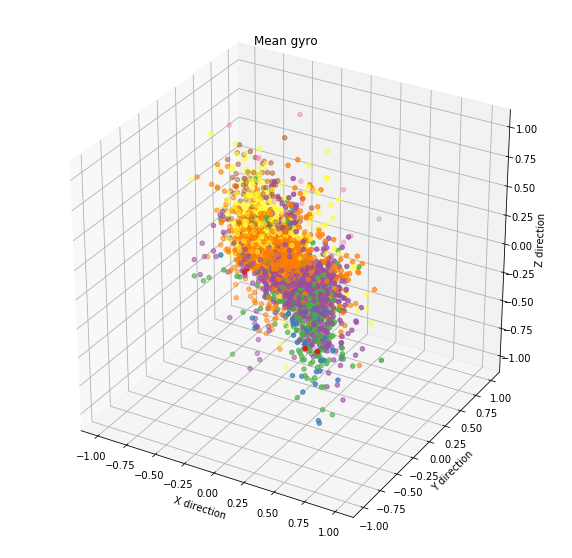

In [246]:
scatter_3D(tBodyGyro_mean, y, "Mean gyro")

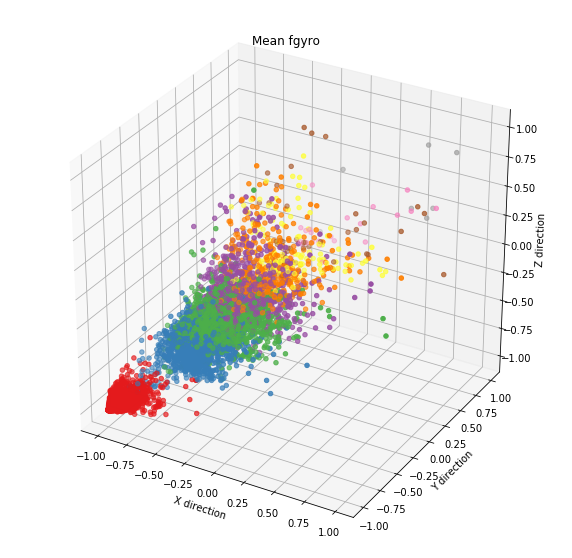

In [247]:
scatter_3D(fBodyGyro_mean, y, "Mean fgyro")

### BodyGyro-energy X-Y-Z

In [248]:
tBodyGyro_energy = data_gyro[['137', '138', '139']]

In [249]:
fBodyGyro_energy = data_gyro[['440', '441', '442']]

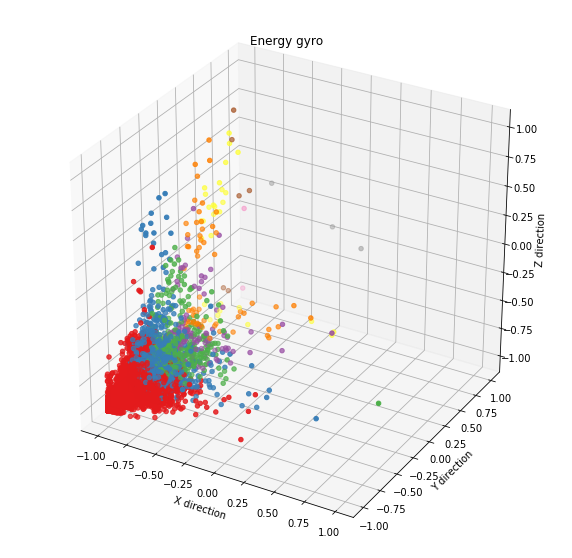

In [250]:
scatter_3D(tBodyGyro_energy, y, "Energy gyro")

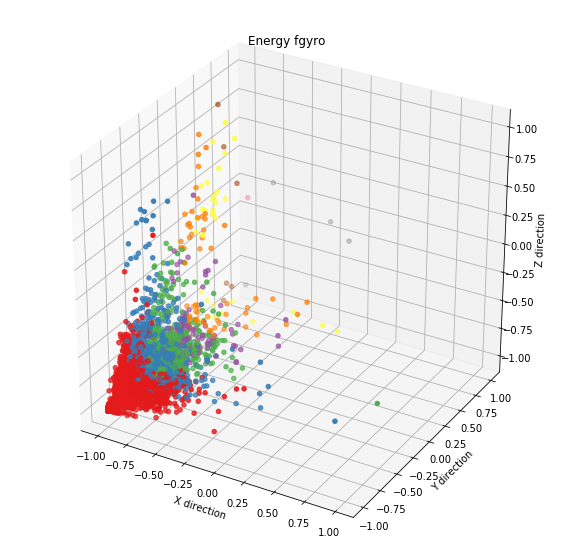

In [251]:
scatter_3D(fBodyGyro_energy, y, "Energy fgyro")

### BodyGyro-entropy X-Y-Z

In [252]:
tBodyGyro_entropy = data_gyro[['143','144','145']]

In [253]:
fBodyGyro_entropy = data_gyro[['446', '447', '448']]

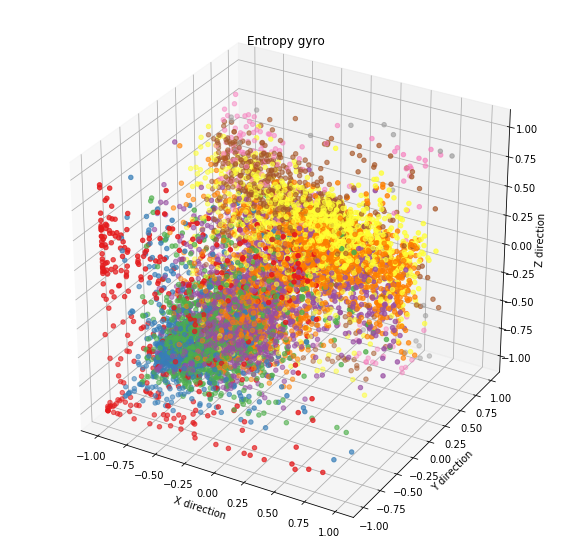

In [254]:
scatter_3D(tBodyGyro_entropy, y, "Entropy gyro")

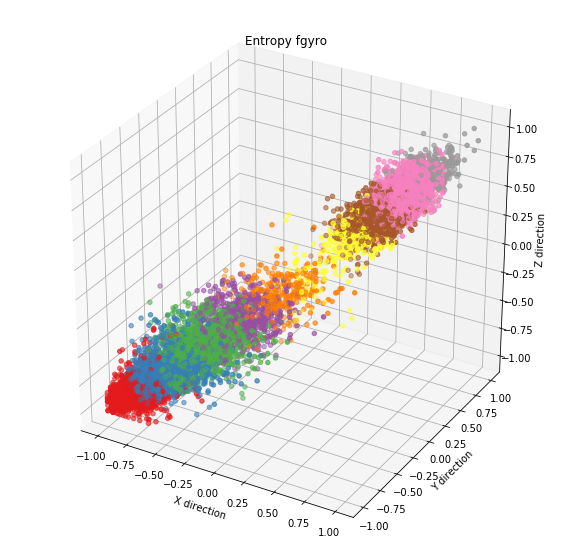

In [255]:
scatter_3D(fBodyGyro_entropy, y, "Entropy fgyro")

### BodyGyroJerk-mean

In [256]:
tBodyGyroJerk_mean = data_gyro[['161', '162', '163']]

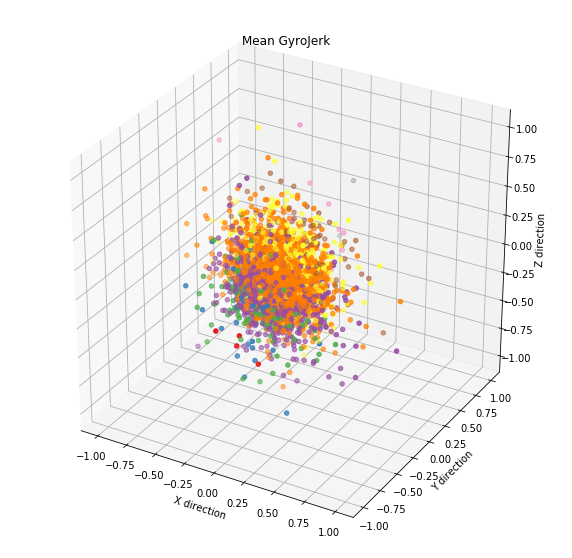

In [257]:
scatter_3D(tBodyGyroJerk_mean, y, "Mean GyroJerk")

### BodyGyroJerk-energy

In [258]:
tBodyGyroJerk_energy = data_gyro[['177', '178', '179']]

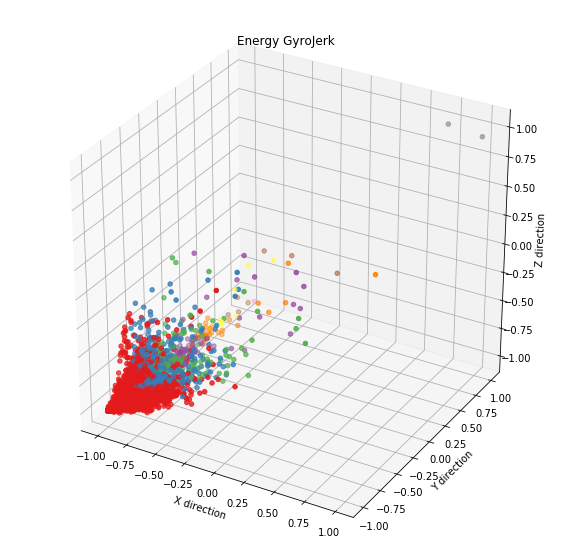

In [259]:
scatter_3D(tBodyGyroJerk_energy, y, "Energy GyroJerk")

### BodyGyroJerk-entropy

In [260]:
tBodyGyroJerk_entropy = data_gyro[['183', '184', '185']]

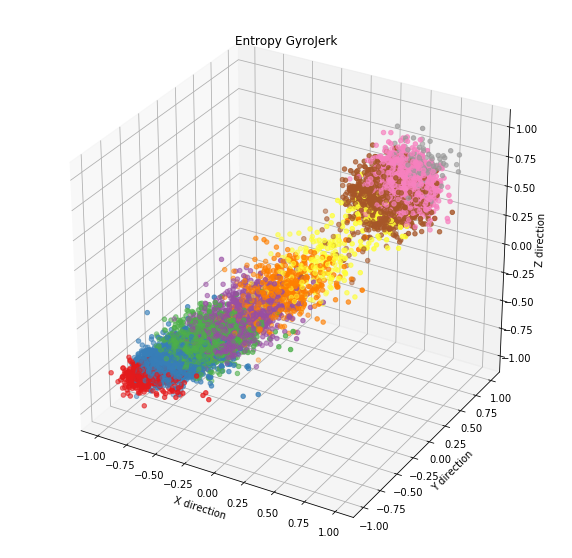

In [261]:
scatter_3D(tBodyGyroJerk_entropy, y, "Entropy GyroJerk")

### BodyGyroMag

In [262]:
import seaborn as sns
def box_1(var, title):
    sns.boxplot(x = y, y = data_gyro[var])
    plt.title(title)

In [263]:
def box_gr(vt, vf, title):
    t = pd.Series(data_gyro[vf])
    yes = pd.Series(np.repeat('yes', len(data_gyro)))
    t = pd.concat([t.reset_index(drop=True), yes, y.reset_index(drop=True)], axis=1)
    t.columns = ['v', 'furier', 'g']    
    
    f = pd.Series(data_gyro[vt])
    no = pd.Series(np.repeat('no', len(data_gyro)))
    f = pd.concat([f.reset_index(drop=True), no, y.reset_index(drop=True)], axis=1)
    f.columns = ['v', 'furier', 'g']
    
    df = t.append(f)
    
    fig=plt.figure(figsize=(12, 8))
    sns.boxplot(data=df, x='g', y='v', hue='furier')
    plt.title(title)

### BodyGyroMag-mean

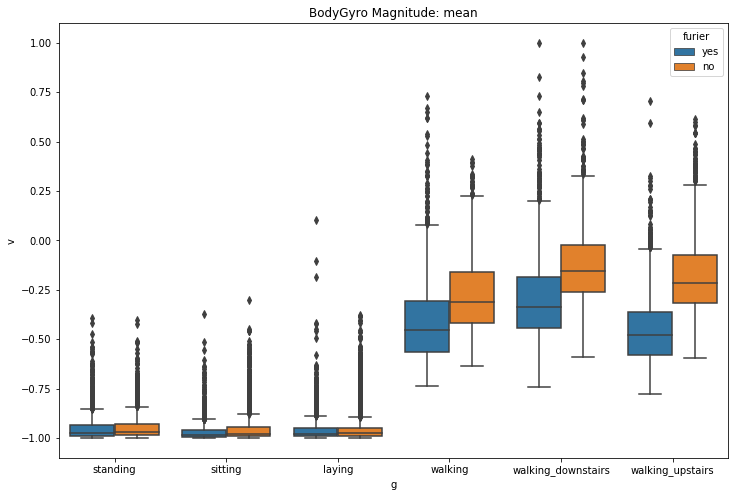

In [264]:
box_gr('240', '529', "BodyGyro Magnitude: mean")

### BodyGyroMag-energy

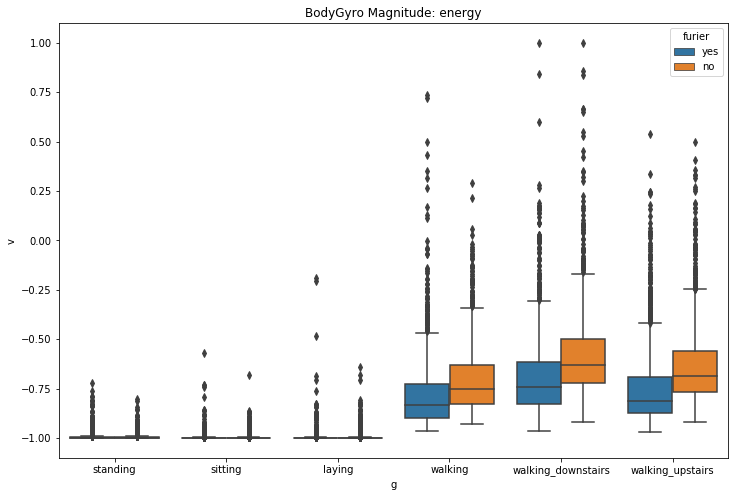

In [265]:
box_gr('246', '535', "BodyGyro Magnitude: energy")

### BodyGyroMag-entropy

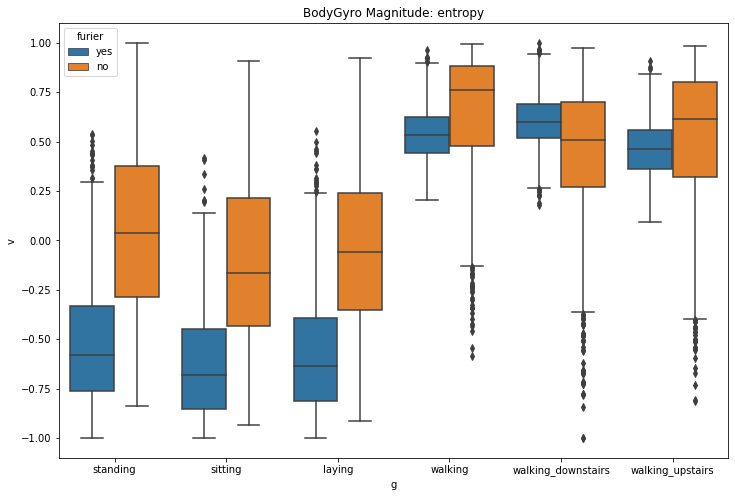

In [266]:
box_gr('248', '537', "BodyGyro Magnitude: entropy")